In [2]:
import warnings
warnings.simplefilter("ignore")

from sktime.forecasting.compose import RecursiveTimeSeriesRegressionForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('../data/dinheiro_massa_2020-2024.csv')

In [15]:
df = df.T
df = df.rename(columns={0:"populacao"})
df.index = pd.to_datetime(df.index)
df.index = df.index.to_period("M")
df.populacao = pd.to_numeric(df.populacao)


<Axes: >

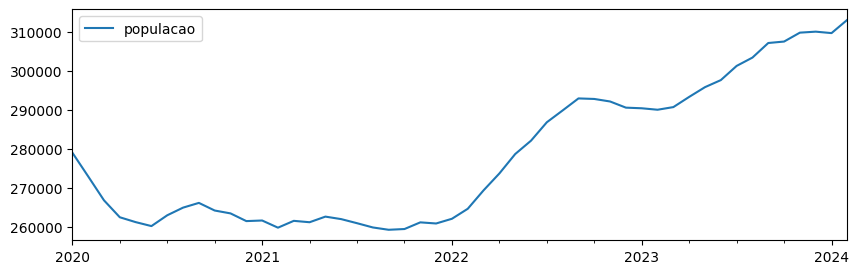

In [16]:
df.plot(figsize=(10,3))

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='populacao'>)

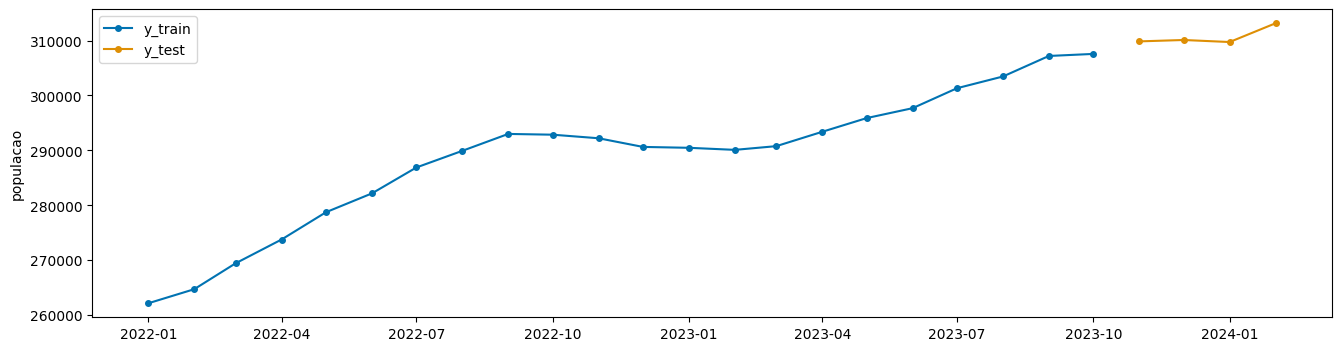

In [24]:
y_train = df['2022-01':'2023-10']
y_test = df['2023-11':]
fh = np.arange(len(y_test))+1
plot_series(y_train, y_test, labels=["y_train", "y_test"])

/home/liputer/Documentos/pibiti/app-live-data/notebooks/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/liputer/Documentos/pibiti/app-live-data/notebooks/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


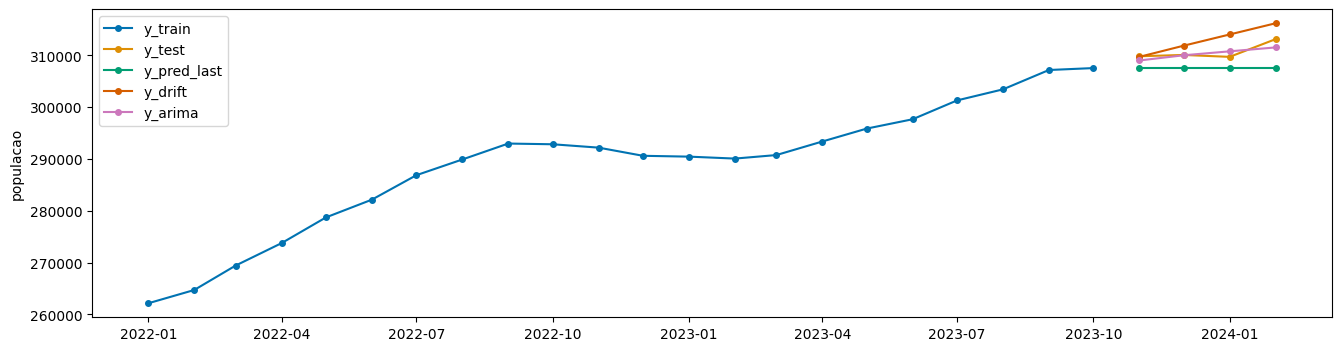

In [25]:
# Naive Forecaster com estratégia 'last'

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

# Naive Forecaster com estratégia 'drift' e sp=12

naive_forecaster_drift = NaiveForecaster(strategy="drift",sp=12)
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

# Arima

arima = AutoARIMA()
arima.fit(y_train)
y_arima = arima.predict(fh)

plot_series(y_train, y_test, y_last,y_drift, y_arima, labels=["y_train", "y_test", "y_pred_last","y_drift", "y_arima"]);

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='populacao'>)

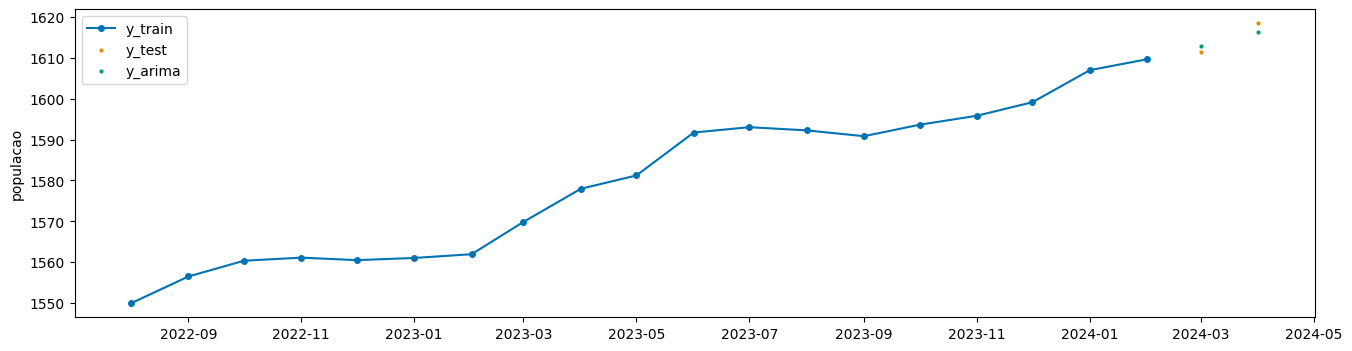

In [ ]:
nascimentos_predict=forecast_df['2024-01':'2024-12'].to_csv('predict_nascimentos.csv')